In [14]:
# Load some test data
import pandas as pd
import matplotlib.pyplot as plt
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
dat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
encoded = pd.get_dummies(dat)

In [12]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [13]:
# Get our target variable and features and split them into test and train datasets

X = dat.drop(['price', 'id', 'date', 'lat', 'long'], axis=1)
y = dat['price']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25)

In [19]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
history = model.fit(X_train, y_train)

In [15]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([289417.06, 690568.5 , 385669.72, ..., 372614.4 , 658000.6 ,
       896491.06], dtype=float32)

In [16]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

# Looks like we're off by just 4.5 dat on average
# Not bad for a quick run with no real preprocessing

160845.84248040564

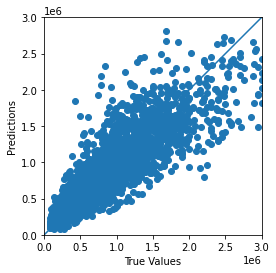

In [17]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Now for more complex stuff

In [29]:
# history.head()
housing.drop([4, 5, 6], axis=0, inplace=True)
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
7,2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


In [12]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
from sklearn.preprocessing import MinMaxScaler  #importing

scaler = MinMaxScaler()  #defining our scaler
housing_scaled = pd.DataFrame(scaler.fit_transform(housing))  #fitting scaler to data and transforming
housing_scaled.head()  #showing the transformed data

[[0.72010308 0.01926557 0.09090909 ... 0.21760797 0.16193426 0.00574235]
 [0.64785332 0.06072131 0.09090909 ... 0.16611296 0.22216486 0.00802712]
 [0.56879485 0.01377049 0.06060606 ... 0.23754153 0.3994149  0.00851302]
 ...
 [0.15378321 0.04289849 0.06060606 ... 0.18272425 0.10686629 0.00155764]
 [0.0293272  0.04262295 0.09090909 ... 0.37375415 0.17398038 0.00073057]
 [0.15378321 0.03278689 0.06060606 ... 0.18272425 0.10686629 0.00081098]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
